## Importing the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Set Seaborn default styles

## Reading the CSV files

In [2]:
data1 = pd.read_csv('minutes_watched_2021_paid_0.csv')
data2 = pd.read_csv('minutes_watched_2022_paid_0.csv')
data3 = pd.read_csv('minutes_watched_2021_paid_1.csv')
data4 = pd.read_csv('minutes_watched_2022_paid_1.csv')

In [3]:
# Display top 5 rows of data1 for quick inspection.
# Instpect the rest of the DataFrames in the same way.
data1.head()

,student_id,minutes_watched,paid_in_q2
0,767,0.05,0
1,1067,0.27,0
2,1151,122.35,0
3,1571,77.60,0
4,2058,0.42,0


## Plot the distributions

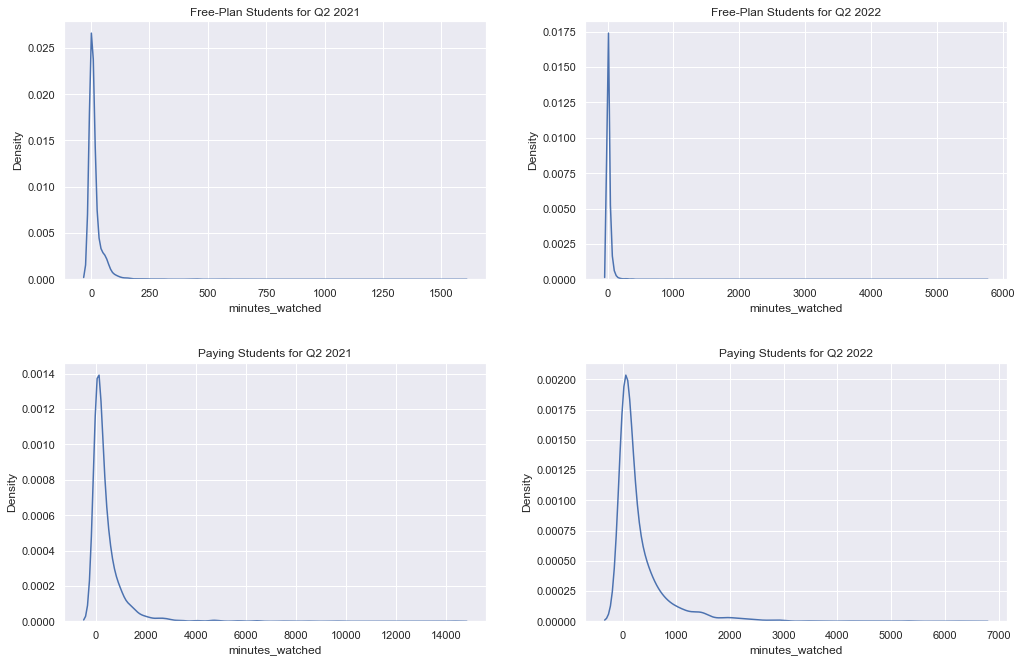

In [4]:
# Create a 2x2 grid of plots comparing minutes watched for free vs. paying students in Q2 2021 and Q2 2022
fig, axes = plt.subplots(2, 2, figsize =(15,10))

# Plot data using kernel density estimation (KDE)
# The "ax" parameter is used to define which subplot or "axis" the plot should be drawn onto.
sns.kdeplot(data1['minutes_watched'], ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021')
sns.kdeplot(data2['minutes_watched'], ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022')
sns.kdeplot(data3['minutes_watched'], ax = axes[1, 0]).set(title = 'Paying Students for Q2 2021')
sns.kdeplot(data4['minutes_watched'], ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022')

# The tight_layout function adjusts the spacing between subplots and the figure edges 
# in order to reduce overlaps and better utilize the plotting area.
# The "pad" parameter controls the padding between the figure edge and the edges 
# of subplots, as a fraction of the font size.
fig.tight_layout(pad = 3.0)

plt.show()

## Remove outliers

In [5]:
# Remove outliers by keeping only the data below the 99th percentile
q1 = data1['minutes_watched'].quantile(0.99)

# With the help of conditional filtering, we can remove outliers based on quantile values.

# "data1['minutes_watched']<q1" creates a boolean mask. For each row in "data1"  it checks 
# if the value in the "minutes_watched" column is less than the 99th percentile value.
# This mask will return True for all the rows where 'minutes_watched' is less than the 99th 
# percentile and False otherwise.

# "data1[data1['minutes_watched']<q1]" filters the data1 dataframe using the boolean mask created 
# in the previous step. Only rows where the condition is True will be retained.
data_no_outliers1 = data1[data1['minutes_watched']<q1]

q2 = data2['minutes_watched'].quantile(0.99)
data_no_outliers2 = data2[data2['minutes_watched']<q2]

q3 = data3['minutes_watched'].quantile(0.99)
data_no_outliers3 = data3[data3['minutes_watched']<q3]

q4 = data4['minutes_watched'].quantile(0.99)
data_no_outliers4 = data4[data4['minutes_watched']<q4]

## Plot the new distributions

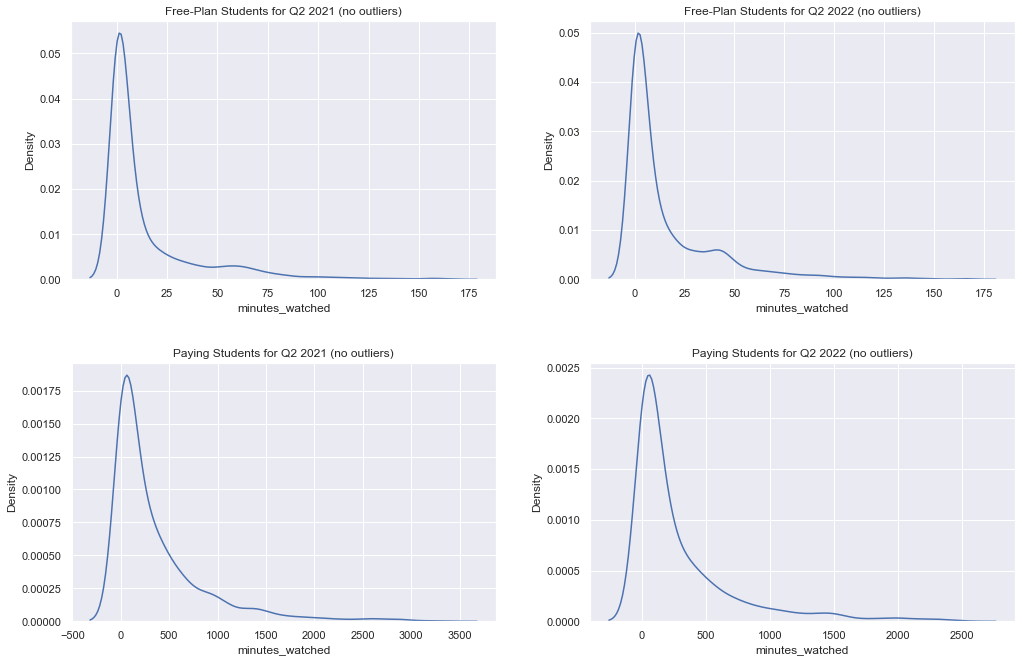

In [6]:
# Create a 2x2 grid of plots for the data without outliers
fig, axes = plt.subplots(2, 2, figsize =(15,10))

# Plot data without outliers using KDE
sns.kdeplot(data_no_outliers1['minutes_watched'], 
            ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021 (no outliers)')
sns.kdeplot(data_no_outliers2['minutes_watched'], 
            ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022 (no outliers)')
sns.kdeplot(data_no_outliers3['minutes_watched'], 
            ax = axes[1, 0]).set(title = 'Paying Students for Q2 2021 (no outliers)')
sns.kdeplot(data_no_outliers4['minutes_watched'], 
            ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022 (no outliers)')

# Adjust layout for better visualization
fig.tight_layout(pad = 3.0)

plt.show()

## Save the dataframes to CSV files

In [7]:
# Uncomment either of the following lines to save the cleaned data without outliers to a new CSV file

# data_no_outliers1.to_csv('minutes_watched_2021_paid_0_no_outliers.csv',index=False)
# data_no_outliers2.to_csv('minutes_watched_2022_paid_0_no_outliers.csv',index=False)
# data_no_outliers3.to_csv('minutes_watched_2021_paid_1_no_outliers.csv',index=False)
# data_no_outliers4.to_csv('minutes_watched_2022_paid_1_no_outliers.csv',index=False)